# Network Science - UDD

## Network centrality

This notebook was prepared by **Yessica Herrera-Guzmán** for the Network Science course at Universidad del Desarrollo, which is taught by Cristian Candia-Vallejos. 

Notebook prepared based on the course curriculum and the original presentation by Prof. Albert-László Barabási from Northeastern University, with permission. 

Please note that this notebook is intended for educational purposes and is not intended for commercial use or distribution.

Happy coding!!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import networkx as nx

In [12]:
import matplotlib.colors as colors
from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

**People who contracted COVID**

This is a randomly generated dataset to illustrate the construction of heatmap on network centrality.

In this network, nodes are individuals and they are linked if they were infected with the same COVID variant. 

In [3]:
data = pd.read_csv('COVID_people.csv')

In [4]:
g = nx.Graph()

In [5]:
data.head(2)

,Source,Target
0,Charlie,Sam
1,Charlie,Nina


In [7]:
g = nx.from_pandas_edgelist(data, source='Source', target='Target')

In [8]:
print(nx.info(g))

Graph with 59 nodes and 1265 edges


In [9]:
layout = nx.spring_layout(g, k=0.1, iterations=50)

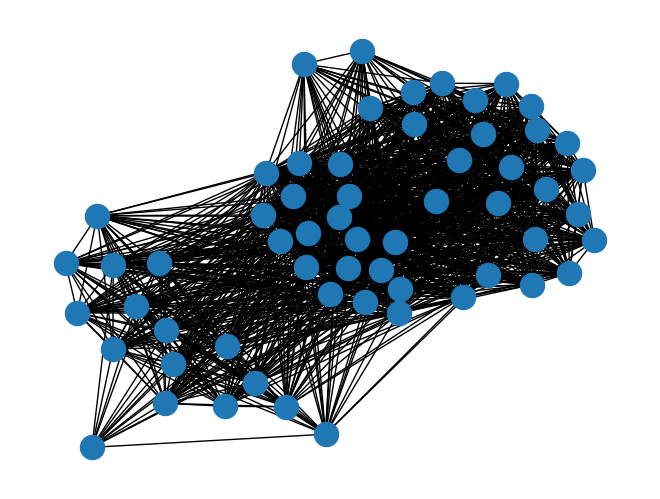

In [ ]:
nx.draw(g)

**Define the function to draw the network**

In [17]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(g, layout, node_size=80, 
                                   edgecolors='black', 
                                   linewidths=0.4, cmap='YlGnBu', 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(colors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(g, layout, edge_color="darkgray", alpha=0.2)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

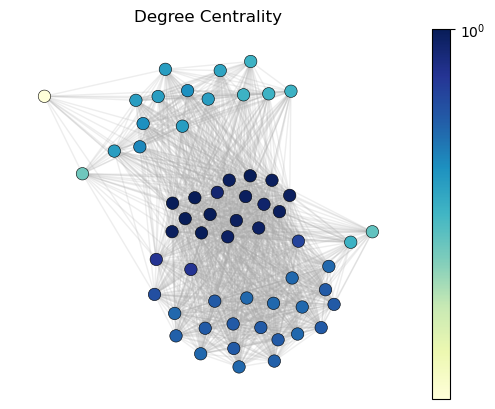

In [27]:
draw(g, layout, nx.degree_centrality(g), 'Degree Centrality')

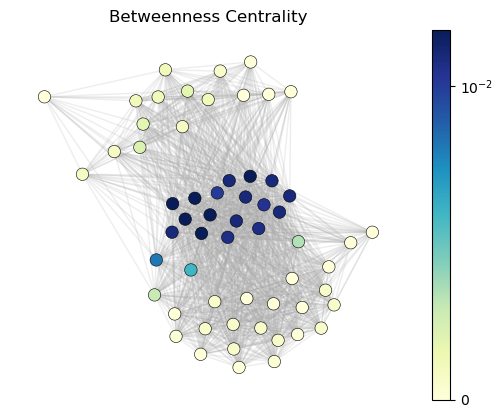

In [26]:
draw(g, layout, nx.betweenness_centrality(g), 'Betweenness Centrality')

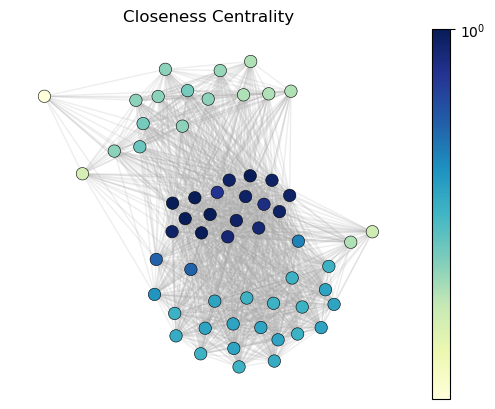

In [25]:
draw(g, layout, nx.closeness_centrality(g), 'Closeness Centrality')

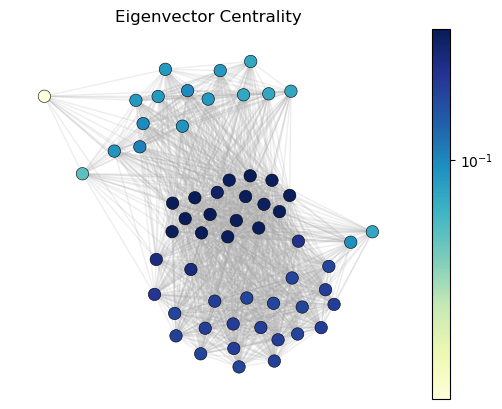

In [24]:
draw(g, layout, nx.eigenvector_centrality(g), 'Eigenvector Centrality')

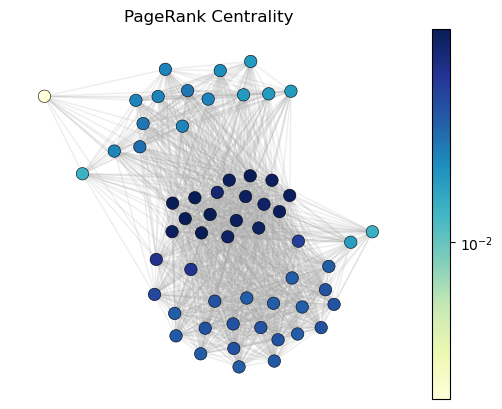

In [23]:
draw(g, layout, nx.pagerank(g, alpha=0.85), 'PageRank Centrality')

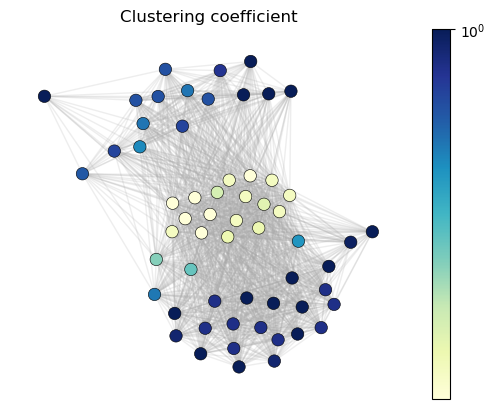

In [22]:
draw(g, layout, nx.clustering(g), 'Clustering coefficient')

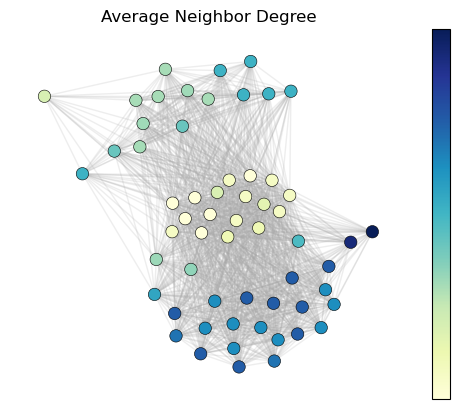

In [28]:
draw(g, layout, nx.average_neighbor_degree(g), 'Average Neighbor Degree')

In [29]:
hubs_dict, auth_dict = nx.hits(g, max_iter=100)

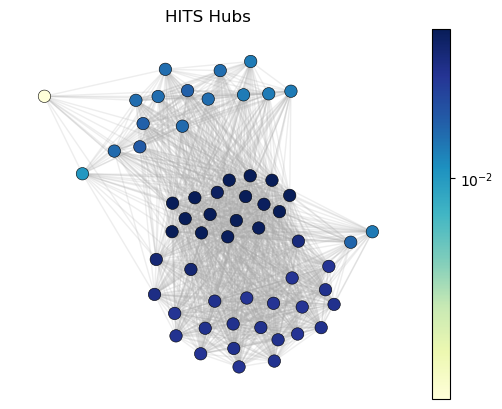

In [30]:
draw(g, layout, hubs_dict, 'HITS Hubs')

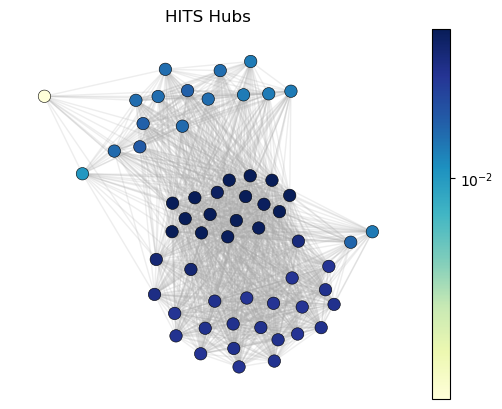

In [31]:
draw(g, layout, auth_dict, 'HITS Hubs')

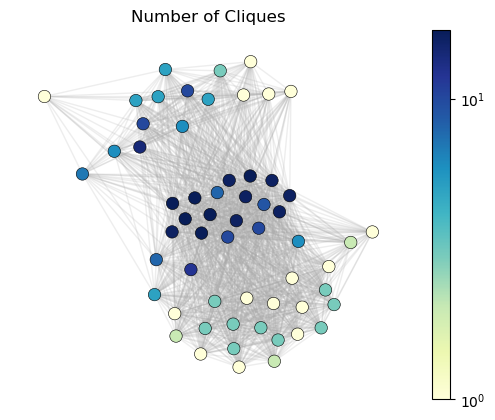

In [32]:
draw(g, layout, nx.number_of_cliques(g), 'Number of Cliques')

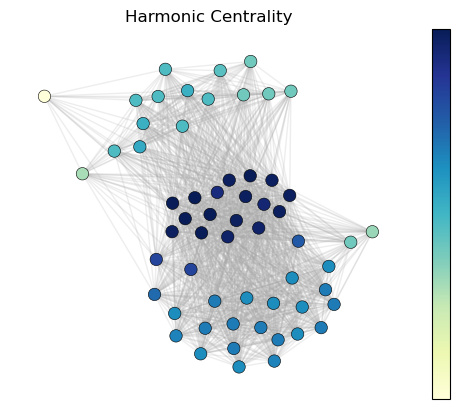

In [33]:
draw(g, layout, nx.harmonic_centrality(g), 'Harmonic Centrality')

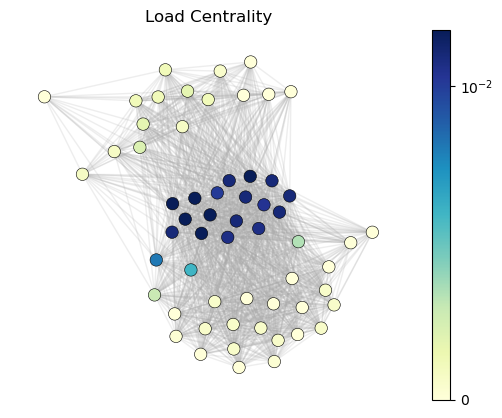

In [34]:
draw(g, layout, nx.load_centrality(g), 'Load Centrality')

# Homework

* Question 1: Identify nodes with the highest degree centrality. What insights can you draw from these nodes given the context of COVID variants?

* Question 2: Would betweenness centrality would be an ideal metric to capture useful information from this system? Explain your answer.  

* Question 3: Given a specific network, describe the characteristics of the network that would make each of the centrality measures studied here more relevant or suitable than others.

* Question 4: Now that you have a deeper understanding of networks, explain the usefulness and limitations of network analysis for the area of your study/expertise. 

* Question 5: What insights can network centralities provide about the formation, robustness, and control of a network?